# Boston Housing Dayta Analysis - Linear Regression using Least Squares Method

In [1]:
# Import Data Analytic modules

import numpy as np

import pandas as pd

from pandas import Series, DataFrame

In [2]:
# Import Data Visualization modules

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

## Importing Data

In [3]:
# Import data from Sckit learn - Boston Housing dataset

from sklearn.datasets import load_boston

boston = load_boston()

print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Overview of data

Text(0, 0.5, 'Number of houses')

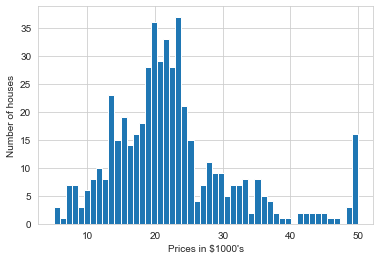

In [4]:
# Overview of prices(target)

plt.hist(boston.target, bins = 50)

plt.xlabel("Prices in $1000's")

plt.ylabel('Number of houses')

Text(0, 0.5, "Prices in $1000's")

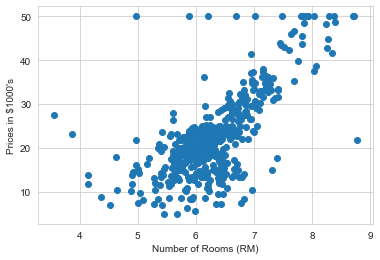

In [5]:
# Understanding the price of the house based on the number of rooms in the house(RM)

plt.scatter(x = boston.data[:,5], y = boston.target)

plt.xlabel('Number of Rooms (RM)')

plt.ylabel("Prices in $1000's")


In [6]:
# Grasping the linear relationship between number of rooms and price of the house

boston_df = pd.DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [22]:
# Adding the price of the houses to the DataFrame

boston_df['Prices'] = boston.target

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


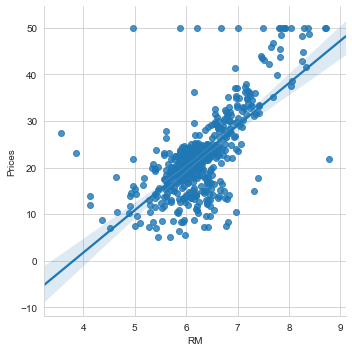

In [23]:
# drawing the linear relationship 

sns.lmplot(x = 'RM', y = 'Prices', data = boston_df)

In [24]:
# conducting Linear Regression (Univariate) - Uning numpy

X = boston_df['RM']

# building out the array

X = np.vstack(boston_df['RM'])

X.shape

(506, 1)

In [25]:
Y = boston_df.Prices

In [26]:
# # equation of the line (eol) - y = mx + b

X = np.array([[value[0], 1] for value in X])

In [27]:
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [28]:
m, b = np.linalg.lstsq(X, Y, rcond=None)[0]

m,b

(9.102108981180312, -34.67062077643856)

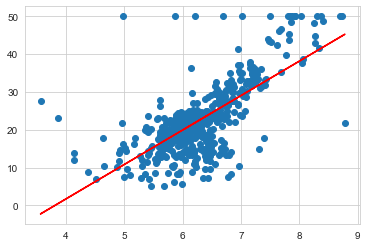

In [29]:
plt.plot(boston_df.RM, boston_df.Prices, marker = 'o', linestyle = '')

x = boston_df.RM

plt.plot(x, m*x+b, 'r', label = 'best fit line')

In [30]:
result = np.linalg.lstsq(X,Y, rcond=None)

result

(array([  9.10210898, -34.67062078]),
 array([22061.87919621]),
 2,
 array([143.99484122,   2.46656609]))

In [31]:
error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print('The root mean square error in %.2f'%rmse)

The root mean square error in 6.60


## 95% of the times, the value of the house will be within $13,200 of the best fit line

## Multivariate Regression

In [32]:
# Importing Sckitlearn

In [33]:
import sklearn

from sklearn.linear_model import LinearRegression

In [34]:
lreg = LinearRegression()

In [50]:
X_multi = boston_df.drop('Prices', axis = 1)

y_target = boston_df.Prices

In [51]:
lreg.fit(X_multi, y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print('The estimated intercept coefficient is %.2f ' %lreg.intercept_)

print('The estimated intercept coefficient is %.2f ' % len(lreg.coef_))

The estimated intercept coefficient is 36.46 
The estimated intercept coefficient is 13.00 


In [54]:
coeff_df = DataFrame(boston_df.columns)

coeff_df.columns = ['Features']

coeff_df['Coefficient Estimates'] = Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimates
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


## Rooms have the strongest realtionship with the price of the house

## Building the Training and Testing Datasets

In [78]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X, boston_df.Prices)

In [86]:
print(X_train.shape)

(379, 2)


In [87]:
print(X_test.shape)

(127, 2)


In [88]:
print(Y_train.shape)

(379,)


In [89]:
print(Y_test.shape)

(127,)


In [83]:
# Predicting House Prices using Training sets

In [90]:
lreg = LinearRegression()

In [91]:
# fitting training data to the Linear Regression

lreg.fit(X_train, y = Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
# Run prediction on X_training and X_testing sets (using predistion methods)

pred_train = lreg.predict(X_train)

pred_test = lreg.predict(X_test)

In [96]:
# Calcualting the Mean Squared Error(MSE)

#Calcualting the MSE of the Y_training model

MSE_y_train = np.mean((Y_train - pred_train)**2)

MSE_y_train

46.859403392292386

In [98]:
#Calcualting the MSE of the Y_testing model

MSE_y_test = np.mean((Y_test-pred_test)**2)

MSE_y_test

34.13304509286457

## Plotting Residual Plot to undestand the model

Text(0.5, 1.0, 'Residual Plots')

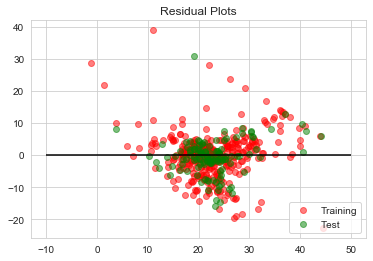

In [102]:
train = plt.scatter(pred_train, (Y_train - pred_train ), color = 'red', alpha = 0.5)

test = plt.scatter(pred_test, (Y_test - pred_test ), color = 'green', alpha = 0.5)

# Plotting horizontal line

plt.hlines(y = 0,xmin = -10,x max = 50)

# Plotting legend

plt.legend((train,test),('Training','Test'),loc='lower right')

plt.title('Residual Plots')

## Scatter plot of Residual values have no pattern, Linear Regression model holds good for the analysis

In [105]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', lreg.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Y_test, pred_test))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(Y_test, pred_test))

Coefficients: 
 [8.78131327 0.        ]
Mean squared error: 34.13
Coefficient of determination: 0.56
